In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from scipy import stats
import time
import datetime

import poloniex

In [2]:
sns.set_style('whitegrid')

In [3]:
polo = poloniex.Poloniex()
period = polo.DAY # period of data
end = time.time()
start = end - period * 365 # 1 year

btc = polo.returnChartData('USDT_BTC', period=period, start=start, end=end)
eth = polo.returnChartData('USDT_ETH', period=period, start=start, end=end)

In [4]:
btc = DataFrame.from_dict(btc)
eth = DataFrame.from_dict(eth)

timestamp = btc['date'].values.tolist() # Series -> ndarray -> list
# timestamp -> year/month/day
date = [datetime.datetime.fromtimestamp(timestamp[i]).date() for i in range(len(timestamp))]

btc = btc.astype(float)
eth = eth.astype(float)

btc['date'] = date
btc['timestamp'] = timestamp
eth['date'] = date
eth['timestamp'] = timestamp

In [5]:
btc.drop(['quoteVolume', 'weightedAverage'], axis=1, inplace=True)
eth.drop(['quoteVolume', 'weightedAverage'], axis=1, inplace=True)

In [6]:
for df in [btc, eth]:
    df['EMA20'] = df['open'].ewm(span=20).mean()
    df['SMA50'] = df['open'].rolling(window=50).mean()

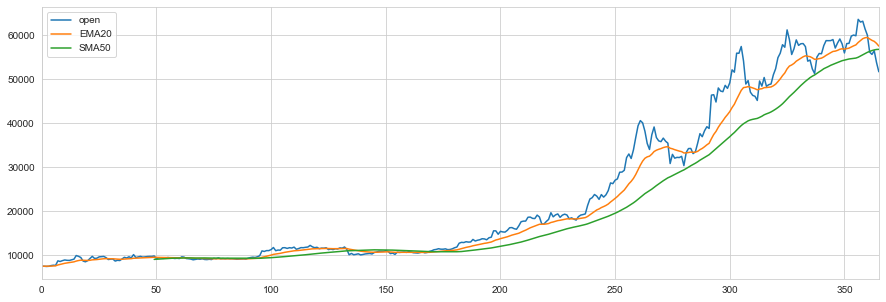

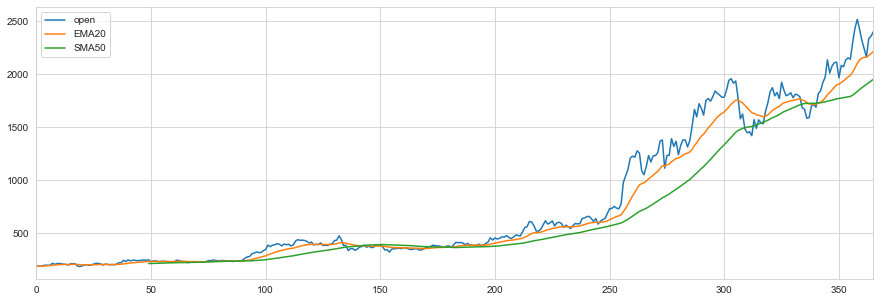

In [7]:
for df in [btc, eth]:
    df[['open', 'EMA20', 'SMA50']].plot(subplots=False, figsize=(15, 5))

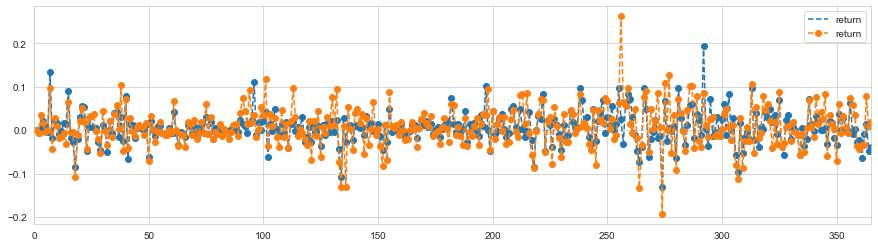

In [8]:
for df in [btc, eth]:
    df['return'] = df['open'].pct_change()
    df['return'].plot(figsize=(15,4), legend=True, linestyle='--', marker='o')

## Regression

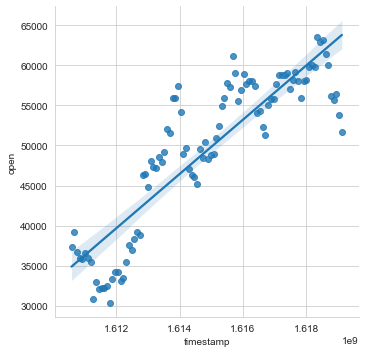

In [15]:
sns.lmplot(x='timestamp', y='open', data=btc.tail(100))

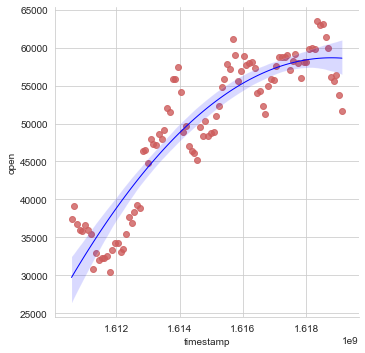

In [21]:
sns.lmplot(x='timestamp', y='open', data=btc.tail(100), order=2,
          scatter_kws={'marker':'o', 'color':'indianred'},
          line_kws={'linewidth':1, 'color':'blue'})

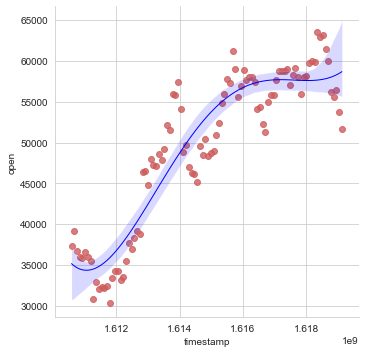

In [20]:
sns.lmplot(x='timestamp', y='open', data=btc.tail(100), order=4,
          scatter_kws={'marker':'o', 'color':'indianred'},
          line_kws={'linewidth':1, 'color':'blue'})